## 1) Dataset Load

In [6]:
import pandas as pd

In [8]:
# Load the dataset
# If the dataset is a CSV file, use pd.read_csv('file_path.csv')
df = pd.read_csv('C:\\Users\\Jantoin\\Documents\\Car_Insurance\\car_insurance_data\\train.csv')

In [9]:
# Review the first few rows
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [10]:
# Get information about the dataset
df.info()

# Get summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Review column names and data types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

## 2) Exploratory Data Analysis (EDA)

In [11]:
print(df.describe())

       policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786    

#### Visualize Distributions

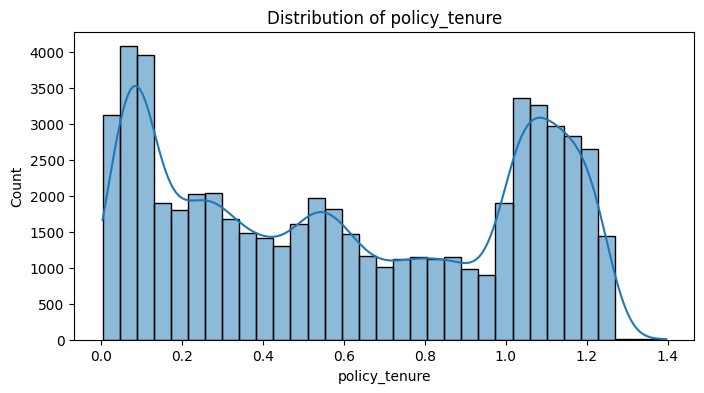

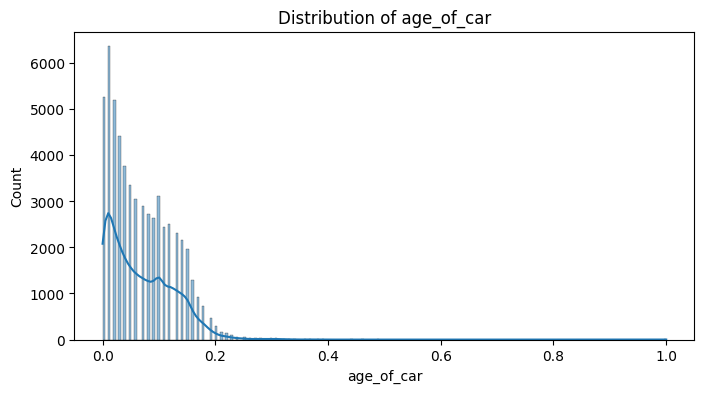

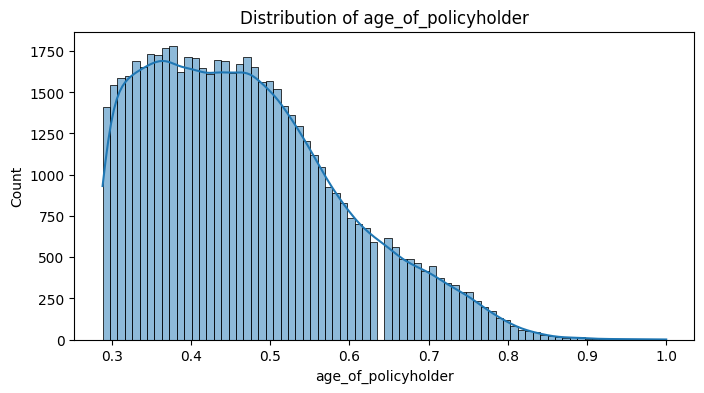

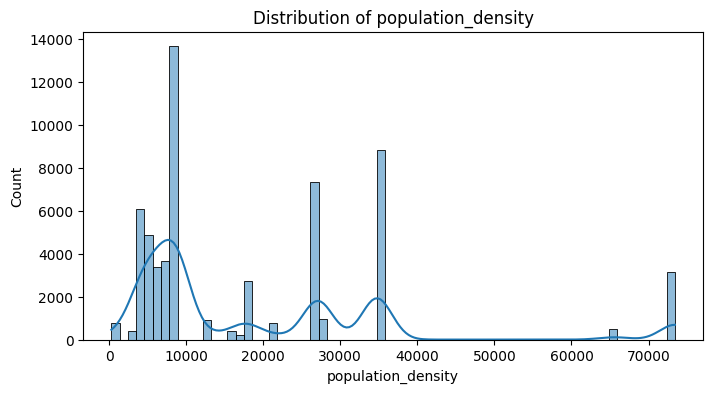

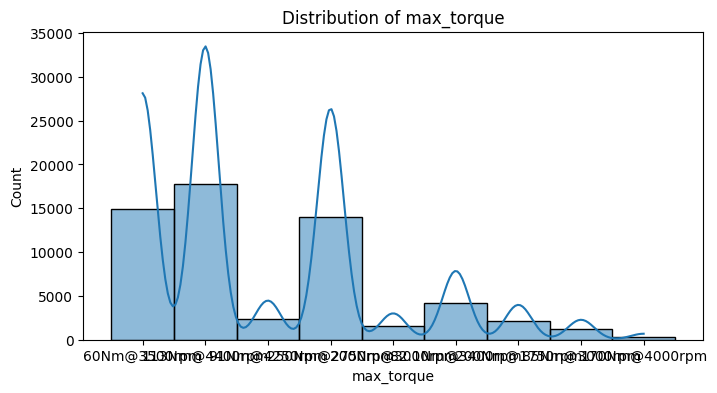

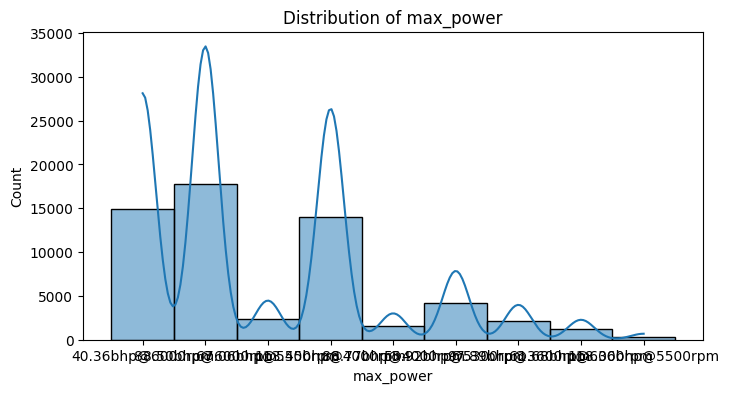

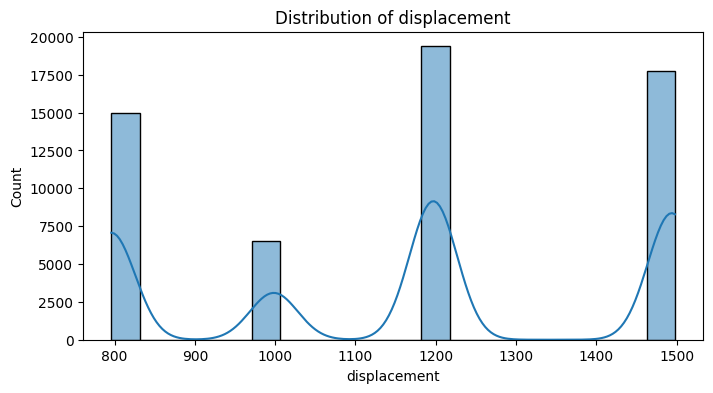

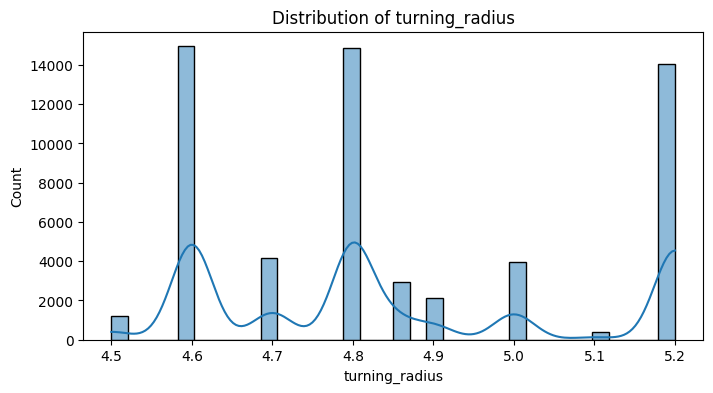

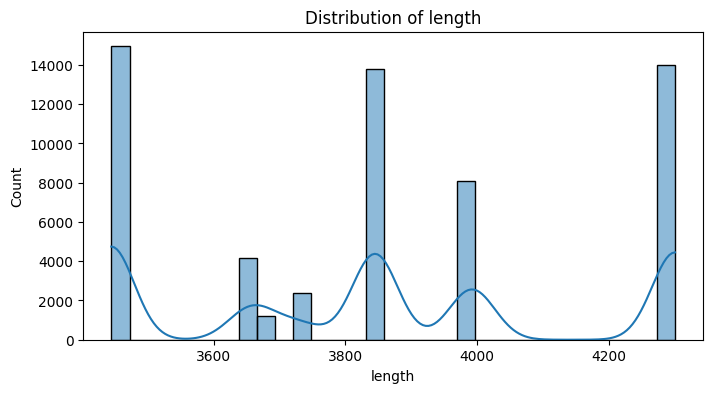

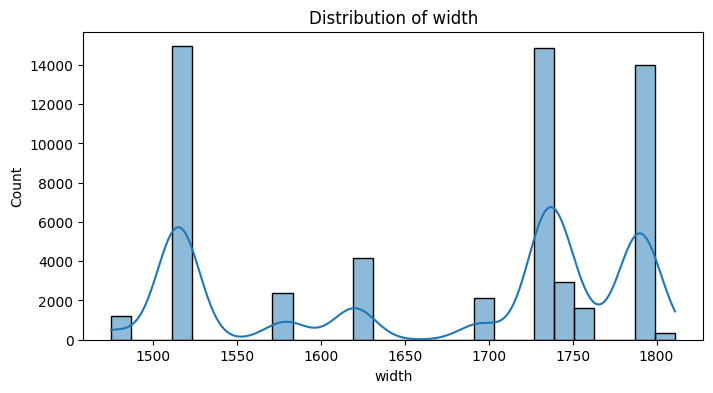

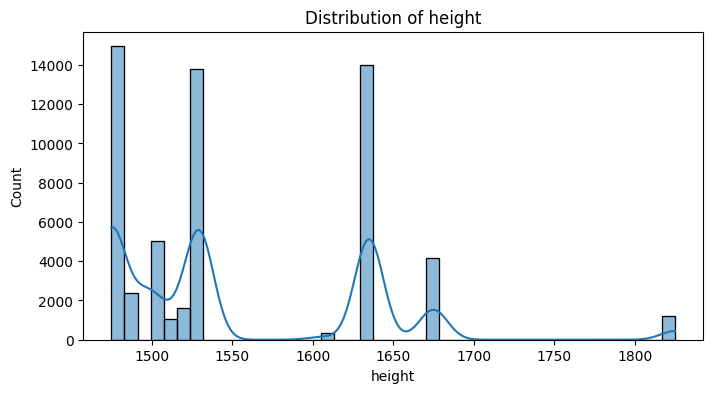

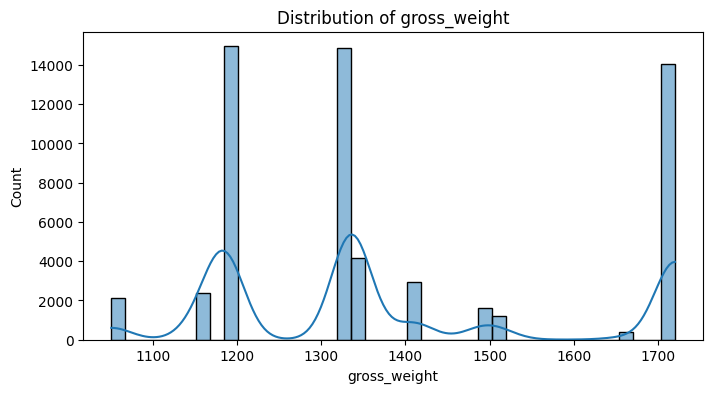

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical features
numerical_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'max_torque', 'max_power', 'displacement', 'turning_radius', 'length', 'width', 'height', 'gross_weight']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Visualize Correlations

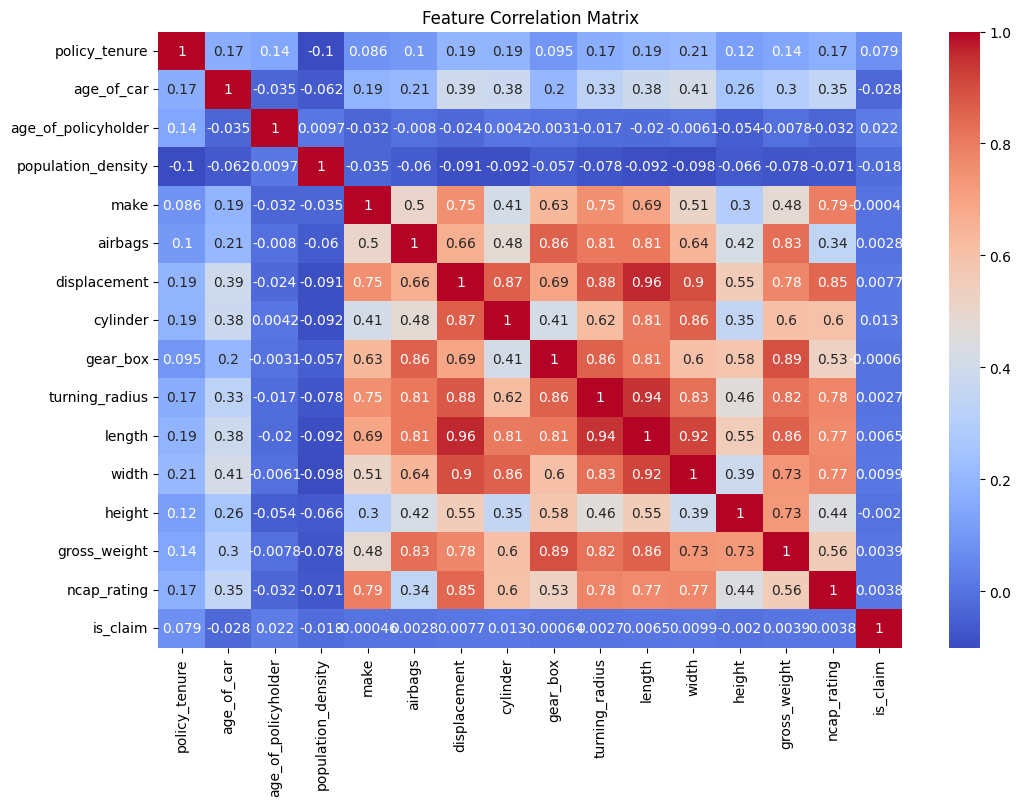

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Visualize correlations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

#### Visualize class imbalance

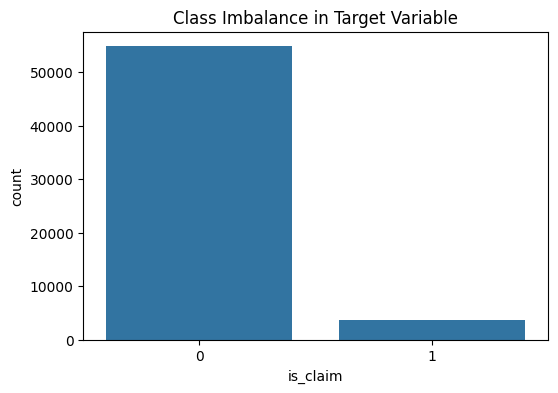

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_claim', data=df)
plt.title('Class Imbalance in Target Variable')
plt.show()

#### Identify anomalies using box plots

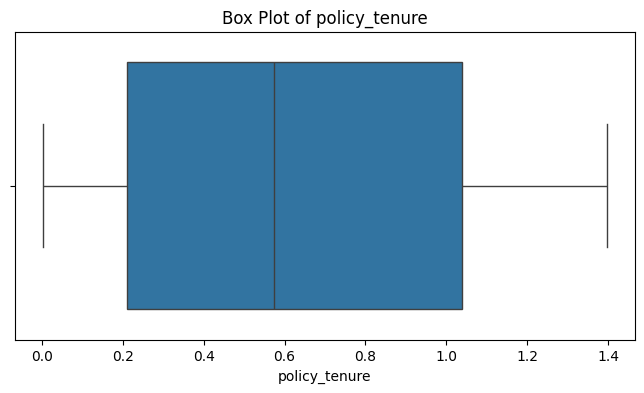

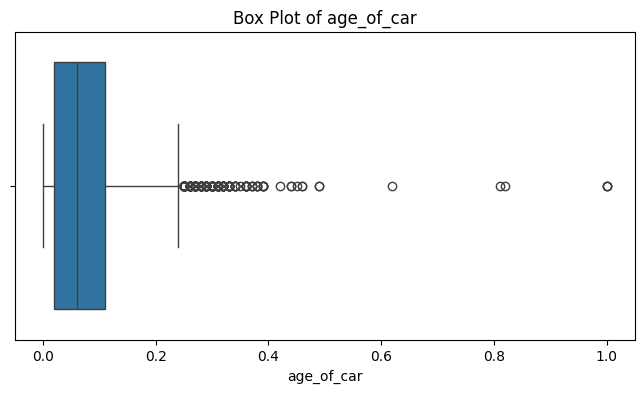

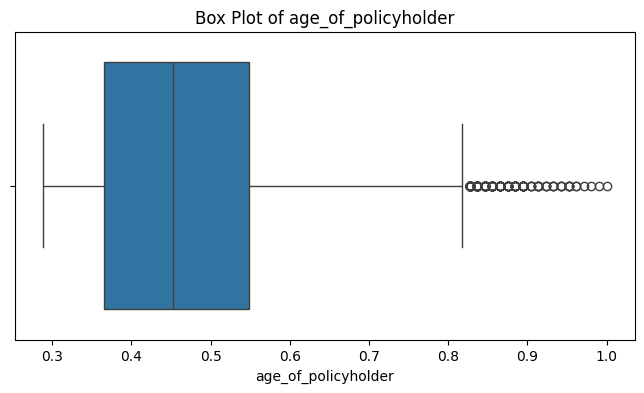

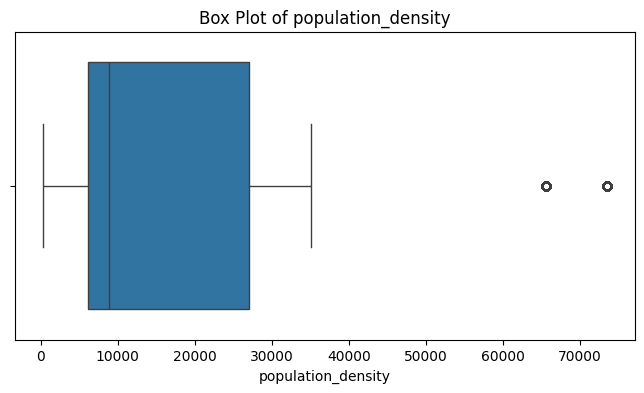

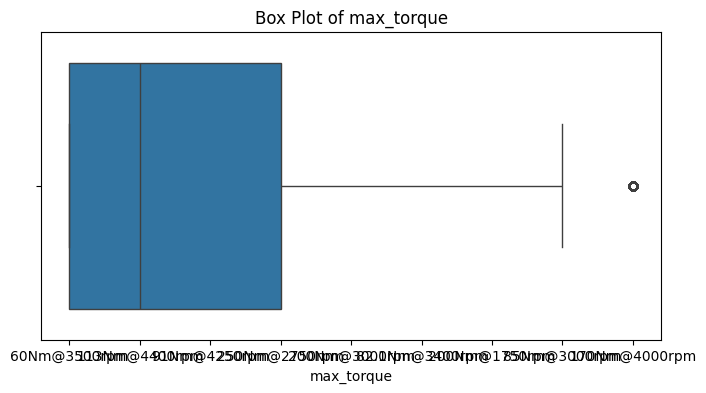

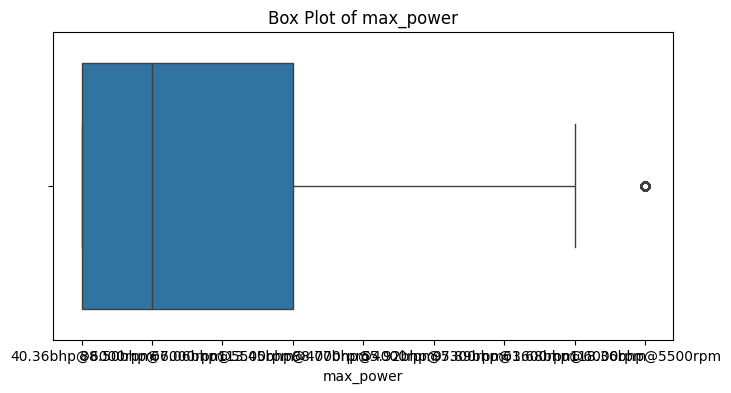

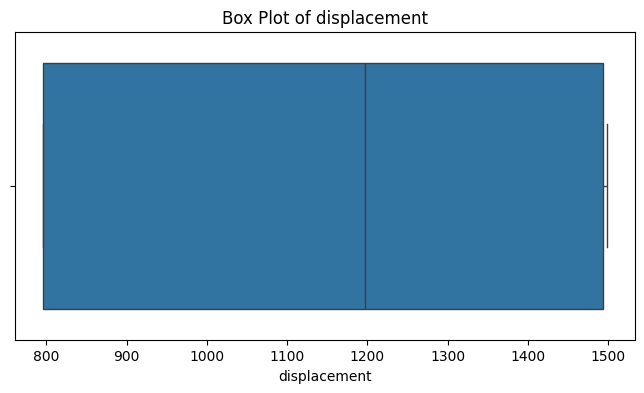

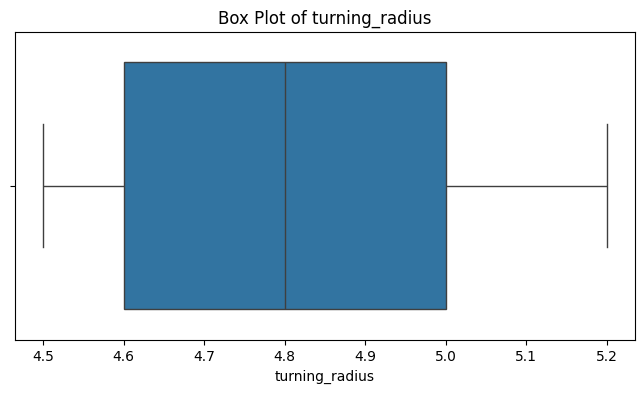

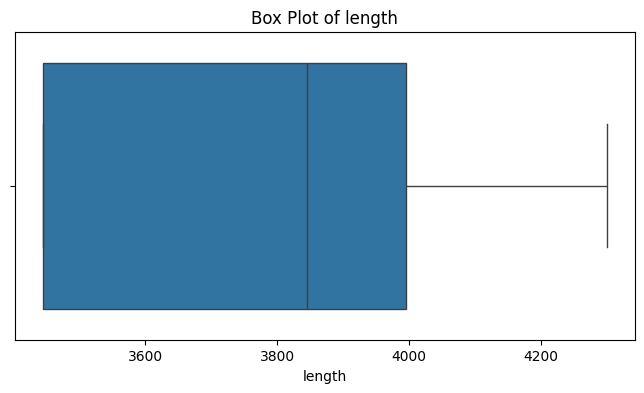

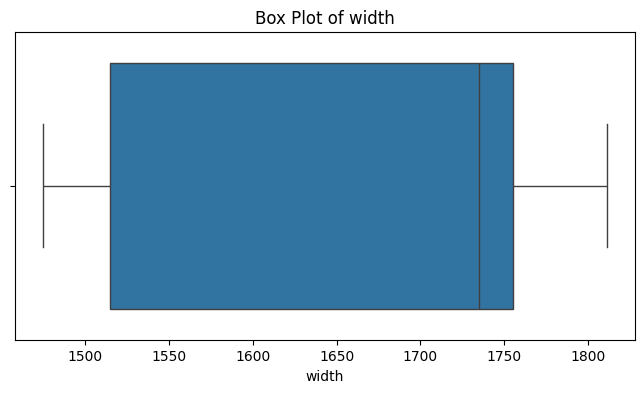

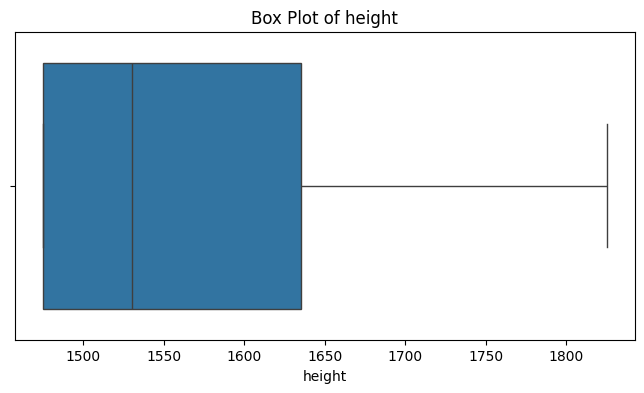

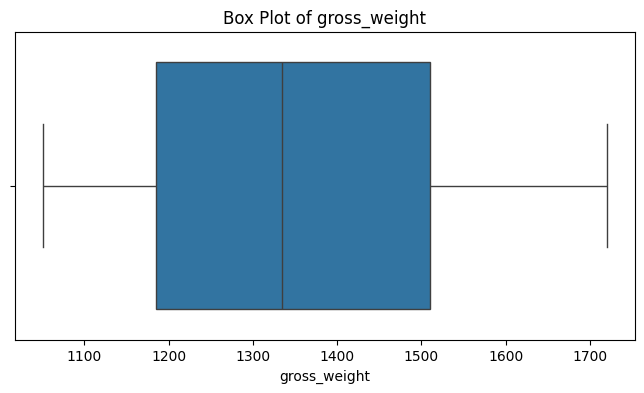

Missing values in each column:
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius     

In [15]:
# Identify anomalies using box plots
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

## 3) Data Preprocessing

#### Handle Missing/Null Values

In [53]:
# Check for missing values
print(df.isnull().sum())

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

#### Encode Categorical Features

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example: Label Encoding for binary categorical features
label_encoder = LabelEncoder()
df['is_esc'] = label_encoder.fit_transform(df['is_esc'])

In [17]:
# Example: One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['fuel_type', 'transmission_type'])

#### Normalize/Scale Numerical Features

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re

# Function to extract numerical value from a string

# Function to extract numerical value from a string
def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r'(\d+(\.\d+)?)', value)
        return float(match.group(1)) if match else np.nan
    return value  # If it's already a float or NaN, return as is

# Apply the function to extract numerical values
df['max_torque'] = df['max_torque'].apply(extract_numeric)
df['max_power'] = df['max_power'].apply(extract_numeric)

# Normalize/scale numerical features
scaler = StandardScaler()
numerical_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'max_torque', 'max_power', 'displacement', 'turning_radius', 'length', 'width', 'height', 'gross_weight']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## 4) Baseline Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# Prepare the data
# Assuming 'is_claim' is the target variable and all other columns are features
X = df.drop(columns=['policy_id', 'is_claim'])  # Exclude non-numeric and target columns
y = df['is_claim']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['is_claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
# Extract feature names
feature_names = X.columns.tolist()
print("Feature Names:", feature_names)
# Get the count of features
feature_count = len(feature_names)

# Print the feature count
print("Number of Features:", feature_count)

Feature Names: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'max_torque', 'max_power', 'airbags', 'is_esc', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'fuel_type_CNG', 'fuel_type_Diesel', 'fuel_type_Petrol', 'transmission_type_Automatic', 'transmission_type_Manual', 'area_cluster_C1', 'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3', 'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_A', 'segment_B1', 'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility', 'model_M1', 'model_M10', 'model_M11', 'model_M2', 'model_M3', 'model_M4', 'model_M5', 'model_M6', '

In [64]:
# Select a sample row (e.g., the first row)
sample_row = X.iloc[0]
print("Sample Values:", sample_row.tolist())
# Convert to dictionary
sample_data_dict = sample_row.to_dict()

Sample Values: [np.float64(-0.23028345370620318), np.float64(-0.3424468480660336), np.float64(1.4225572831502378), np.float64(-0.7835130121516211), np.int64(1), np.float64(-1.0178378080975135), np.float64(-1.3941562559214882), np.int64(2), np.int64(0), np.float64(-1.3757130765393306), np.int64(3), np.int64(5), np.float64(-1.1088930011293292), np.float64(-1.3018817891912242), np.float64(-1.4027676158653037), np.float64(-0.9838458340456927), np.float64(-0.942828419644943), np.int64(0), np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_,

In [65]:
import json
# Save to JSON file
with open('sample_data.json', 'w') as f:
    json.dump(sample_data_dict, f)

#### Train Logistic Regression

In [21]:
# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Train Decision Tree

In [22]:
# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Evaluate Logistic Regression

In [23]:
# Evaluate Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_precision = precision_score(y_test, y_pred_logistic)
logistic_recall = recall_score(y_test, y_pred_logistic)
logistic_f1 = f1_score(y_test, y_pred_logistic)

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
# Evaluate Decision Tree
y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

In [25]:
# Record baseline metrics
baseline_metrics = {
    'Logistic Regression': {
        'Accuracy': logistic_accuracy,
        'Precision': logistic_precision,
        'Recall': logistic_recall,
        'F1 Score': logistic_f1
    },
    'Decision Tree': {
        'Accuracy': tree_accuracy,
        'Precision': tree_precision,
        'Recall': tree_recall,
        'F1 Score': tree_f1
    }
}

In [26]:
print("Baseline Metrics:")
print(baseline_metrics)

Baseline Metrics:
{'Logistic Regression': {'Accuracy': 0.9354893762266405, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 0.8693574537076543, 'Precision': 0.08198489751887811, 'Recall': 0.10052910052910052, 'F1 Score': 0.0903149138443256}}


## 5) Advanced Modeling

In [27]:
!pip install lightgbm


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [29]:
# Implement Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
# Implement XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:40:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [31]:
# Implement LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2992, number of negative: 43881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063832 -> initscore=-2.685539
[LightGBM] [Info] Start training from score -2.685539


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [32]:
# Evaluate models using cross-validation
rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='f1')
xgb_cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='f1')
lgbm_cv_scores = cross_val_score(lgbm_model, X_scaled, y, cv=5, scoring='f1')

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:41:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:41:58] WARNING: 

[LightGBM] [Info] Number of positive: 2998, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063960 -> initscore=-2.683399
[LightGBM] [Info] Start training from score -2.683399


C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2998, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063960 -> initscore=-2.683399
[LightGBM] [Info] Start training from score -2.683399


C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2999, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 46874, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063980 -> initscore=-2.683066
[LightGBM] [Info] Start training from score -2.683066


C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2999, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 46874, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063980 -> initscore=-2.683066
[LightGBM] [Info] Start training from score -2.683066


C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2998, number of negative: 43876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 46874, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063959 -> initscore=-2.683422
[LightGBM] [Info] Start training from score -2.683422


C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [33]:
# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [34]:
# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

In [35]:
# Evaluate LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_precision = precision_score(y_test, y_pred_lgbm)
lgbm_recall = recall_score(y_test, y_pred_lgbm)
lgbm_f1 = f1_score(y_test, y_pred_lgbm)

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [36]:
# Record advanced model metrics
advanced_metrics = {
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1 Score': rf_f1,
        'CV F1 Score': rf_cv_scores.mean()
    },
    'XGBoost': {
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1 Score': xgb_f1,
        'CV F1 Score': xgb_cv_scores.mean()
    },
    'LightGBM': {
        'Accuracy': lgbm_accuracy,
        'Precision': lgbm_precision,
        'Recall': lgbm_recall,
        'F1 Score': lgbm_f1,
        'CV F1 Score': lgbm_cv_scores.mean()
    }
}

In [37]:
print("Advanced Model Metrics:")
print(advanced_metrics)

Advanced Model Metrics:
{'Random Forest': {'Accuracy': 0.9301134909121939, 'Precision': 0.1111111111111111, 'Recall': 0.011904761904761904, 'F1 Score': 0.021505376344086023, 'CV F1 Score': np.float64(0.016027116064993706)}, 'XGBoost': {'Accuracy': 0.9348920556361464, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'CV F1 Score': np.float64(0.0026504137973492343)}, 'LightGBM': {'Accuracy': 0.9354893762266405, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'CV F1 Score': np.float64(0.0005326231691078563)}}


## 6) Hyperparameter Tuning & Feature Engineering

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [67]:
X_test

array([[-0.78607715, -0.34244685,  0.32709759, ...,  0.61704702,
        -0.07895573,  0.07895573],
       [-1.180708  , -0.34244685, -0.53362074, ...,  0.61704702,
        -0.07895573,  0.07895573],
       [-0.96154329, -0.69505514, -0.84660922, ...,  0.61704702,
        -0.07895573,  0.07895573],
       ...,
       [ 1.23138019, -1.04766342, -0.7683621 , ..., -1.62062204,
        -0.07895573,  0.07895573],
       [ 1.29183396,  1.24429045, -0.7683621 , ...,  0.61704702,
        -0.07895573,  0.07895573],
       [ 0.86049925, -1.04766342,  1.57905152, ..., -1.62062204,
        -0.07895573,  0.07895573]], shape=(11719, 110))

In [39]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Define parameter distribution for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    rf_model, 
    rf_param_dist, 
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduce the number of folds
    scoring='f1',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best model
y_pred_rf = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Tuned Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

Tuned Random Forest Metrics:
Accuracy: 0.9349773871490742
Precision: 0.25
Recall: 0.003968253968253968
F1 Score: 0.0078125


In [71]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Save the best Random Forest model to a .pkl file
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Save the X_test data to a .pkl file
joblib.dump(X_test, 'X_test.pkl')
# Save the y_test data to a .pkl file
joblib.dump(y_test, 'y_test.pkl')

# Load the saved Random Forest model
loaded_model = joblib.load('best_rf_model.pkl')

In [69]:
# Load the saved X_test data
loaded_X_test = joblib.load('X_test.pkl')

# Perform predictions using the loaded model and test data
y_pred_rf = loaded_model.predict(loaded_X_test)

# Evaluate the predictions
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Tuned Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

Tuned Random Forest Metrics:
Accuracy: 0.9349773871490742
Precision: 0.25
Recall: 0.003968253968253968
F1 Score: 0.0078125


In [70]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], shape=(11719,))

In [40]:
# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter distribution for RandomizedSearchCV
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0]
}

# Perform RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    xgb_param_dist, 
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Reduce the number of folds
    scoring='f1',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

xgb_random_search.fit(X_train, y_train)
best_xgb_model = xgb_random_search.best_estimator_

# Evaluate the best model
y_pred_xgb = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print("Tuned XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuned XGBoost Metrics:
Accuracy: 0.9332707568905196
Precision: 0.06666666666666667
Recall: 0.0026455026455026454
F1 Score: 0.005089058524173028


In [41]:
# Initialize LightGBM model
lgbm_model = LGBMClassifier()

# Define parameter grid for GridSearchCV
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 61, 91],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV
lgbm_grid_search = GridSearchCV(
    lgbm_model, 
    lgbm_param_grid, 
    cv=3,  # Reduce the number of folds
    scoring='f1',
    n_jobs=-1  # Use all available cores
)

lgbm_grid_search.fit(X_train, y_train)
best_lgbm_model = lgbm_grid_search.best_estimator_

# Evaluate the best model
y_pred_lgbm = best_lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_precision = precision_score(y_test, y_pred_lgbm)
lgbm_recall = recall_score(y_test, y_pred_lgbm)
lgbm_f1 = f1_score(y_test, y_pred_lgbm)

# Print the evaluation metrics
print("Tuned LightGBM Metrics:")
print(f"Accuracy: {lgbm_accuracy}")
print(f"Precision: {lgbm_precision}")
print(f"Recall: {lgbm_recall}")
print(f"F1 Score: {lgbm_f1}")

[LightGBM] [Info] Number of positive: 2992, number of negative: 43881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063832 -> initscore=-2.685539
[LightGBM] [Info] Start training from score -2.685539
Tuned LightGBM Metrics:
Accuracy: 0.9309668060414711
Precision: 0.1044776119402985
Recall: 0.009259259259259259
F1 Score: 0.01701093560145808


C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [42]:
# Evaluate tuned models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

rf_metrics = evaluate_model(best_rf_model, X_test, y_test)
xgb_metrics = evaluate_model(best_xgb_model, X_test, y_test)
lgbm_metrics = evaluate_model(best_lgbm_model, X_test, y_test)

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [43]:
# Document improvements
tuned_metrics = {
    'Tuned Random Forest': {
        'Accuracy': rf_metrics[0],
        'Precision': rf_metrics[1],
        'Recall': rf_metrics[2],
        'F1 Score': rf_metrics[3]
    },
    'Tuned XGBoost': {
        'Accuracy': xgb_metrics[0],
        'Precision': xgb_metrics[1],
        'Recall': xgb_metrics[2],
        'F1 Score': xgb_metrics[3]
    },
    'Tuned LightGBM': {
        'Accuracy': lgbm_metrics[0],
        'Precision': lgbm_metrics[1],
        'Recall': lgbm_metrics[2],
        'F1 Score': lgbm_metrics[3]
    }
}

In [44]:
print("Tuned Model Metrics:")
print(tuned_metrics)

Tuned Model Metrics:
{'Tuned Random Forest': {'Accuracy': 0.9349773871490742, 'Precision': 0.25, 'Recall': 0.003968253968253968, 'F1 Score': 0.0078125}, 'Tuned XGBoost': {'Accuracy': 0.9332707568905196, 'Precision': 0.06666666666666667, 'Recall': 0.0026455026455026454, 'F1 Score': 0.005089058524173028}, 'Tuned LightGBM': {'Accuracy': 0.9309668060414711, 'Precision': 0.1044776119402985, 'Recall': 0.009259259259259259, 'F1 Score': 0.01701093560145808}}


In [45]:
# Feature Importance
rf_importance = best_rf_model.feature_importances_
xgb_importance = best_xgb_model.feature_importances_
lgbm_importance = best_lgbm_model.feature_importances_

In [52]:
best_rf_model

,n_estimators,200
,criterion,'gini'
,max_depth,30
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
# Select important features
important_features_rf = pd.Series(rf_importance, index=X.columns).sort_values(ascending=False)
important_features_xgb = pd.Series(xgb_importance, index=X.columns).sort_values(ascending=False)
important_features_lgbm = pd.Series(lgbm_importance, index=X.columns).sort_values(ascending=False)

In [47]:
print("Important Features (Random Forest):")
print(important_features_rf.head(10))

print("Important Features (XGBoost):")
print(important_features_xgb.head(10))

print("Important Features (LightGBM):")
print(important_features_lgbm.head(10))

Important Features (Random Forest):
policy_tenure          0.454029
age_of_policyholder    0.285215
age_of_car             0.169345
population_density     0.021175
area_cluster_C8        0.004539
area_cluster_C2        0.004099
area_cluster_C14       0.003598
area_cluster_C3        0.003540
area_cluster_C5        0.003500
area_cluster_C13       0.002930
dtype: float64
Important Features (XGBoost):
is_day_night_rear_view_mirror_No    0.023009
max_torque                          0.022948
area_cluster_C18                    0.021759
is_brake_assist_No                  0.021210
gross_weight                        0.020466
height                              0.020279
area_cluster_C21                    0.020218
is_parking_camera_No                0.020091
area_cluster_C4                     0.019981
steering_type_Power                 0.019816
dtype: float32
Important Features (LightGBM):
policy_tenure          9432
age_of_policyholder    6352
age_of_car             4132
population_density 

## 7) Identify top predictive features

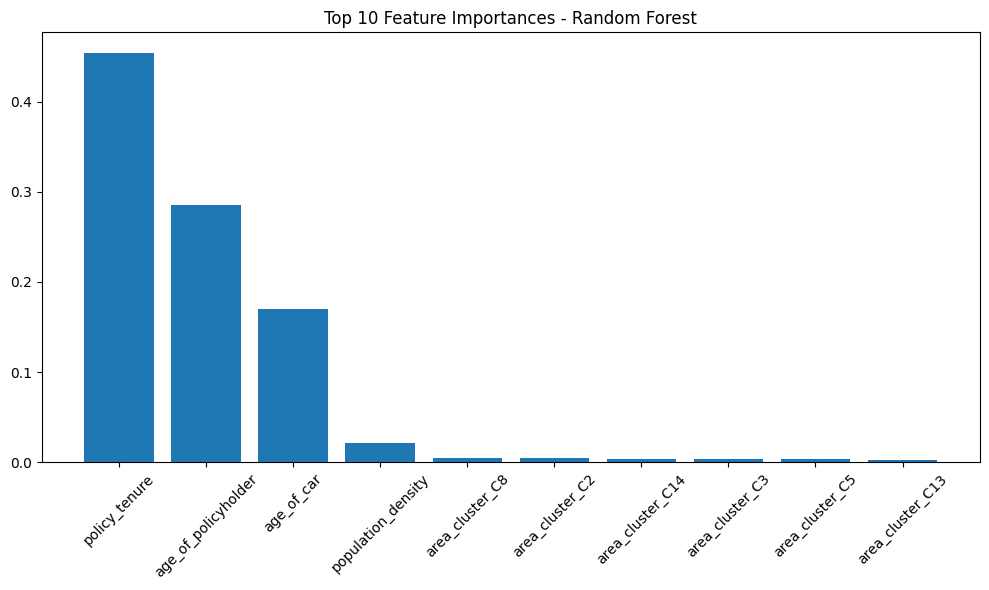

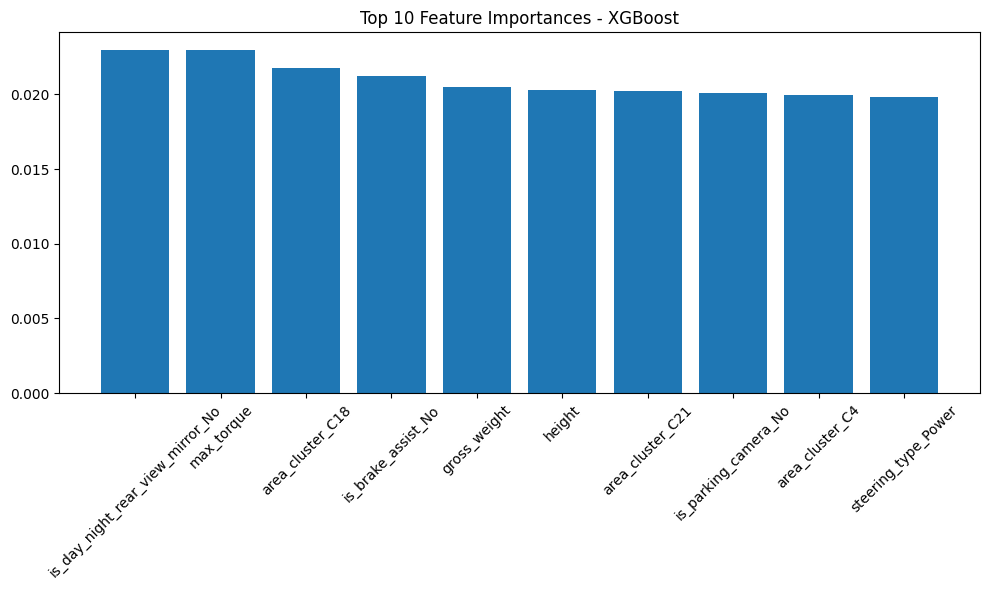

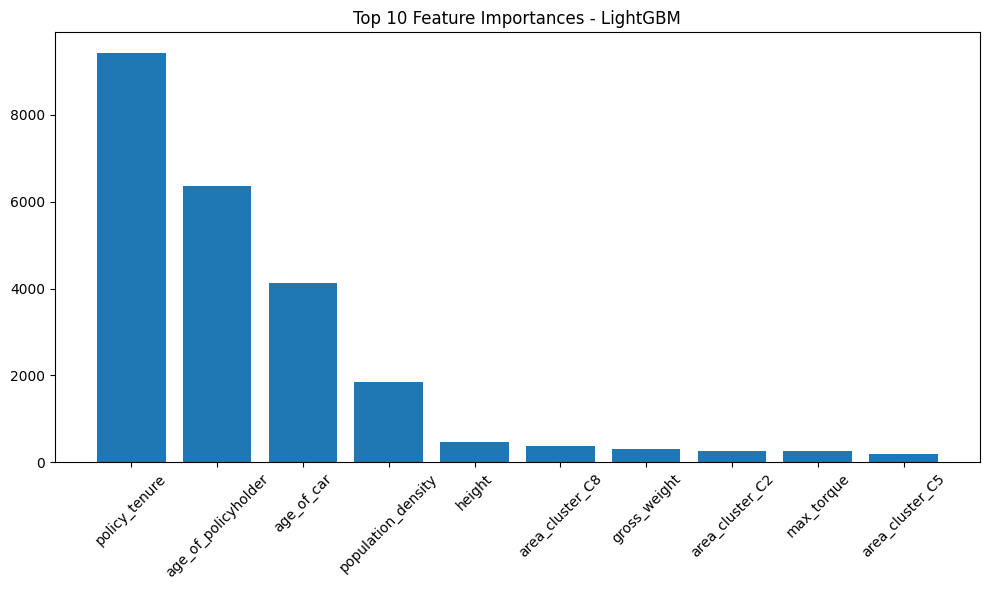

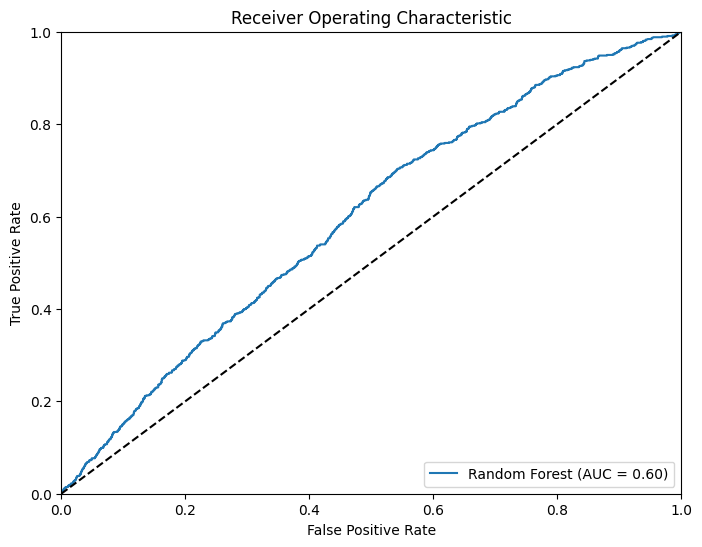

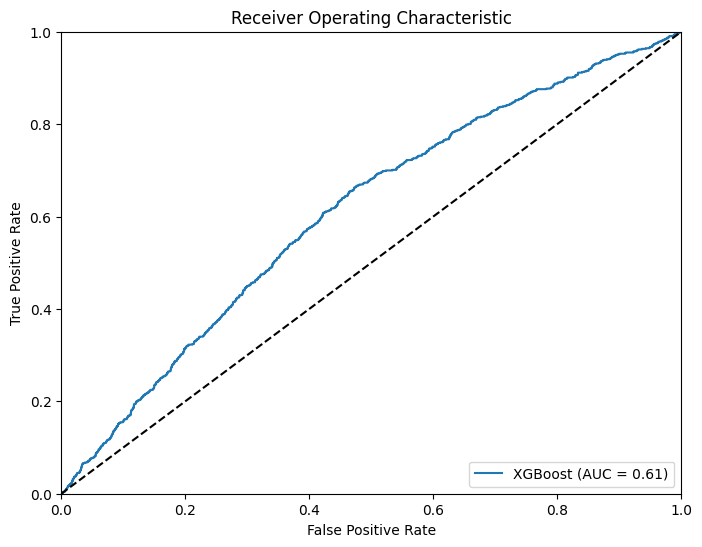

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


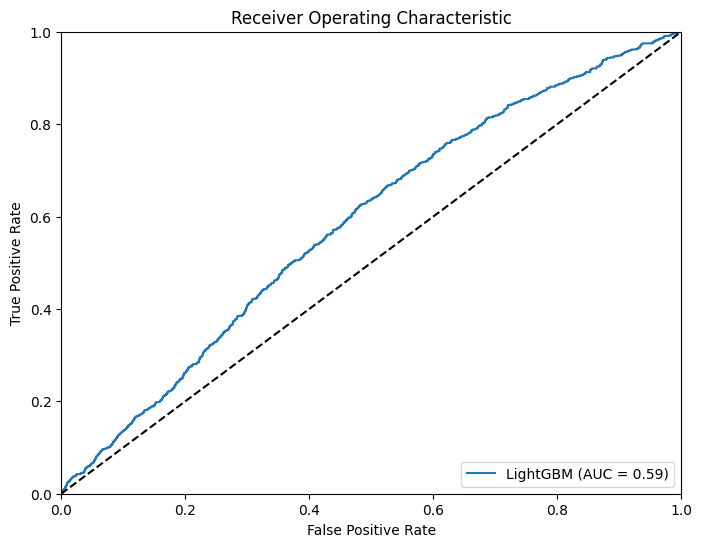


    Business Insights:
    1. The top predictive features identified are crucial for understanding customer behavior and risk assessment.
    2. Models with higher AUC scores indicate better discrimination between positive and negative classes, suggesting effective risk prediction.
    3. Feature importance plots highlight key areas for targeted marketing and risk management strategies.
    4. Continuous monitoring and refinement of models can lead to improved decision-making and customer satisfaction.
    


In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Identify top predictive features using feature importance from the best model
# Assuming best_rf_model, best_xgb_model, and best_lgbm_model are defined
rf_importance = best_rf_model.feature_importances_
xgb_importance = best_xgb_model.feature_importances_
lgbm_importance = best_lgbm_model.feature_importances_

# Feature importance plots
def plot_feature_importance(importances, model_name, feature_names):
    sorted_indices = importances.argsort()[::-1]
    top_indices = sorted_indices[:10]  # Top 10 features
    plt.figure(figsize=(10, 6))
    plt.title(f"Top 10 Feature Importances - {model_name}")
    plt.bar(range(len(top_indices)), importances[top_indices], align='center')
    plt.xticks(range(len(top_indices)), feature_names[top_indices], rotation=45)
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_importance, "Random Forest", X.columns)
plot_feature_importance(xgb_importance, "XGBoost", X.columns)
plot_feature_importance(lgbm_importance, "LightGBM", X.columns)

# Generate ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(best_rf_model, X_test, y_test, "Random Forest")
plot_roc_curve(best_xgb_model, X_test, y_test, "XGBoost")
plot_roc_curve(best_lgbm_model, X_test, y_test, "LightGBM")

# Draft business insights
def draft_business_insights():
    insights = """
    Business Insights:
    1. The top predictive features identified are crucial for understanding customer behavior and risk assessment.
    2. Models with higher AUC scores indicate better discrimination between positive and negative classes, suggesting effective risk prediction.
    3. Feature importance plots highlight key areas for targeted marketing and risk management strategies.
    4. Continuous monitoring and refinement of models can lead to improved decision-making and customer satisfaction.
    """
    print(insights)

draft_business_insights()

In [50]:
###SAVING THE MODEL
import joblib

# Save the best model using joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')
joblib.dump(best_lgbm_model, 'best_lgbm_model.pkl')

# To load the model later
# loaded_model = joblib.load('best_rf_model.pkl')

['best_lgbm_model.pkl']

## 8) Saving the final model

In [49]:
import joblib

# Save the best model using joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')
joblib.dump(best_lgbm_model, 'best_lgbm_model.pkl')


['best_lgbm_model.pkl']